# 2021-10-07 Third batch of deterministic model fits

Results below are for commit: https://github.com/gmarkkula/COMMOTIONSFramework/commit/67d3e9409414774aaf4def10adb4330c9b9985c2
(Rerunning the code below for other commits is not guaranteed/likely to give the same results.)

Same as the previous diary entry, but with a slightly denser/enlarged parameter grid:

    PARAM_ARRAYS['T_delta'] = (10, 20, 40, 60, 90)
    PARAM_ARRAYS['beta_V'] = (1, 3, 5, 9, 15, 27, 45, 81, 135, 243)
    PARAM_ARRAYS['T_Of'] = (0.5, 1, 2, 4, math.inf)
    PARAM_ARRAYS['sigma_O'] = (0.02, 0.05, 0.1, 0.2, 0.5, 1, 2.5)
    
I have also improved `do_2...py` a little bit, to give more detail on main vs secondary criteria, with the `ActPedLeading` criteria belonging to the latter.

## Overview results for all models

In [6]:
%run ../SCPaper/do_2_analyse_deterministic_fits

['C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVA.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAa.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEo.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEooBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEooBEvoAI.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAaoBEvoAI.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAoBEo.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAoBEooBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAoBEooBEvoAI.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAoBEv.pkl', 'C:\\GITHUB\\COMMOTIONSFramework\\SCPaper/results\\DetFit_oVAoBEvoAI.pkl']

Loading parameter search from file "C:\GITHUB\COMMOTIONSFramework\SCPaper/results\DetFit_oVA.pkl"...
	Done.


## In-depth looks / discussion

None of the conclusions change compared to the previous, smaller run. Also the parameter values below tell the same basic story as before, in terms of a redundancy between $T_\delta$ and $\beta_V$. We can now also see a slight redundancy between $T_{Of}$ and $\sigma_O$, where the small $\sigma_O = 0.02$ m only works for if the time scale for forgetting is quite short ($T_{Of} \leq 1$).

In [7]:
for model in ('oVAoBEvoAI', 'oVAoBEooBEvoAI'):
    print(f'Parameterisations for model {model} meeting all four criteria:')
    fit = det_fits[model]
    i_good_parameterisations = np.nonzero(fit.n_main_criteria_met == 4)[0]
    for i_param in i_good_parameterisations:
        print(fit.get_params_dict(fit.results.params_matrix[i_param, :]))
    print()

Parameterisations for model oVAoBEvoAI meeting all four criteria:
{'T_delta': 10.0, 'beta_V': 5.0}
{'T_delta': 10.0, 'beta_V': 9.0}
{'T_delta': 20.0, 'beta_V': 9.0}
{'T_delta': 20.0, 'beta_V': 15.0}
{'T_delta': 40.0, 'beta_V': 27.0}
{'T_delta': 60.0, 'beta_V': 27.0}
{'T_delta': 40.0, 'beta_V': 45.0}
{'T_delta': 60.0, 'beta_V': 45.0}
{'T_delta': 90.0, 'beta_V': 45.0}
{'T_delta': 90.0, 'beta_V': 81.0}

Parameterisations for model oVAoBEooBEvoAI meeting all four criteria:
{'T_delta': 20.0, 'beta_V': 9.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 20.0, 'beta_V': 15.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 40.0, 'beta_V': 27.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 60.0, 'beta_V': 27.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 40.0, 'beta_V': 45.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 60.0, 'beta_V': 45.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 90.0, 'beta_V': 45.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 90.0, 'beta_V': 81.0, 'T_Of': 0.5, 'sigma_O': 0.05}
{'T_delta': 40.

### Pedestrian hesitation from otherwise non-viable `oBEo` parameterisation
Out of interest, below I am simulating one of the parameterisations for `oVAoBEooBEvoAI` which achieved "pedestrian hesitation" in the constant-speed scenario. This is a parameterisation with a lower $\beta_V$ than those in the most successful parameterisations above, and where also $\sigma_O$ is relatively high. Overall, this promotes behaviour beliefs near 50/50, which is what is needed to see the pedestrian hesitation in the constant-speed scenario, but which doesn't seem sensible in general, and doesn't meet the other criteria. This reinforces the notion that the current set of assumptions don't really offer what's needed to achieve this sort of hesitation in a natural way.

{'T_delta': 90.0, 'beta_V': 1.0, 'T_Of': 1.0, 'sigma_O': 1.0}
ActVehStatPed


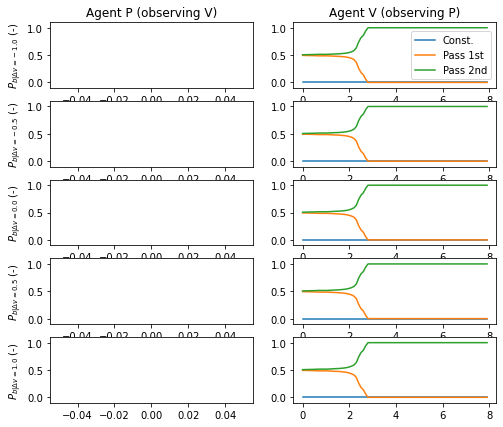

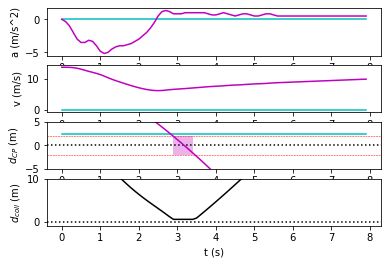

ActVehStatPedPrio


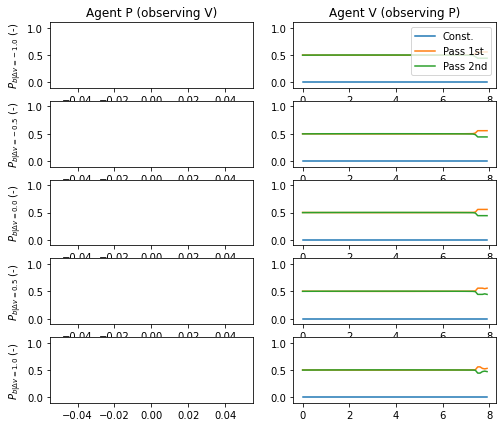

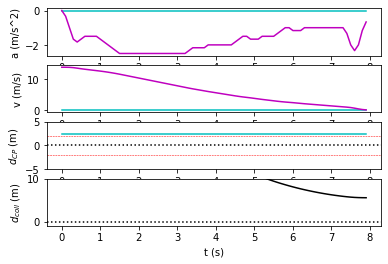

ActPedLeading


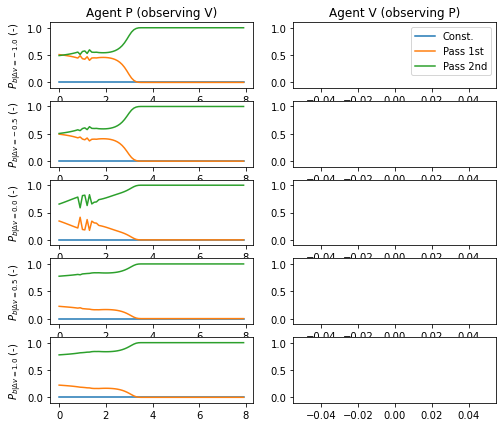

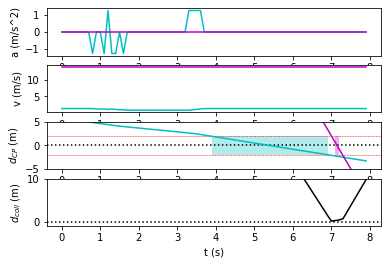

ActPedPrioEncounter


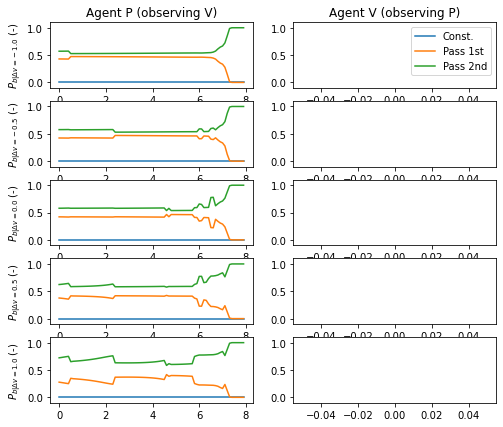

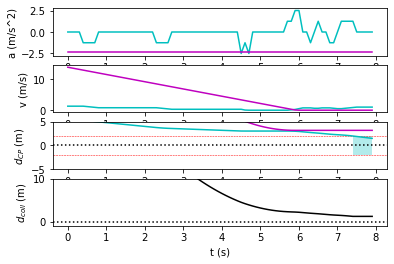

In [10]:
# first just need to add the SCPaper folder to the Python path, to import sc_fitting
import os
THIS_DIR = os.path.abspath('.')
PARENT_DIR, __ = os.path.split(THIS_FILE_DIR)
SCPAPER_DIR = PARENT_DIR + '/SCPaper'
if not PARENT_DIR in sys.path:
    sys.path.append(PARENT_DIR)
import sc_fitting

# simulate oVAoBEooBEvoAI for a parameterisation that achieved pedestrian hesitation in the constant speed scenario
fit = det_fits['oVAoBEooBEvoAI']
i_sec_crit = SEC_CRITERIA.index('ped_hesitate_const')
met_sec_crit = np.nonzero(fit.sec_criteria_matrix[i_sec_crit,:])[0]
free_params = fit.results.params_matrix[met_sec_crit[0],:]
print(fit.get_params_dict(free_params))
fit.set_params(free_params)
for scenario in sc_fitting.DET1S_SCENARIOS.values():
    print(scenario.name)
    sim = fit.simulate_scenario(scenario)
    sim.do_plots(kinem_states=True, beh_probs=True)

### Closer look at the pedestrian start before vehicle stop criterion
Looking closer at the speed profiles in the `ActPedPrioEncounter` the effect is smaller than what one might have hoped for the `oVAoBE*` models, just a tenth of a seconds difference. This is sort of in line with what I have seen before though (e.g., diary notes 2021-08-27), and I know it is because the vehicle is actually decelerating to stop earlier than what the pedestrian expects from a stopping, which means that even when the pedestrian is convinced the vehicle will stop, it still looks like it will be having some speed at its predicted state, which makes it look like crossing will need a big acceleration. 

What surprises me now though that not even the `oVAaoBE*` models do better than this... Based on the previous results (e.g., diary notes 2021-09-01 and 2021-09-08), I was expecting to see some very early crossing from these models.

oVA
{'T_delta': 10.0}
Main criteria met: [False False  True False]


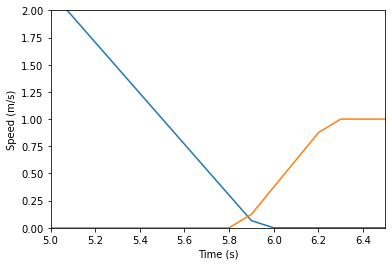

oVAoBEvoAI
{'T_delta': 10.0, 'beta_V': 5.0}
Main criteria met: [ True  True  True  True]


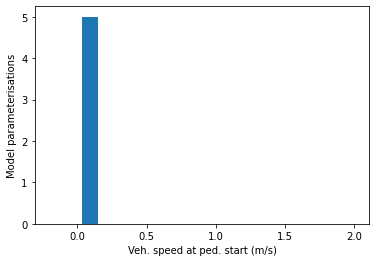

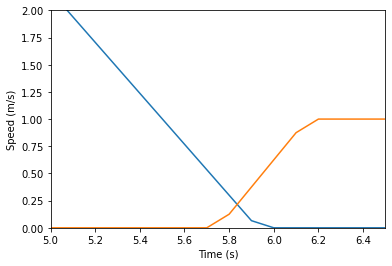

oVAoBEooBEvoAI
{'T_delta': 20.0, 'beta_V': 9.0, 'T_Of': 0.5, 'sigma_O': 0.05}
Main criteria met: [ True  True  True  True]


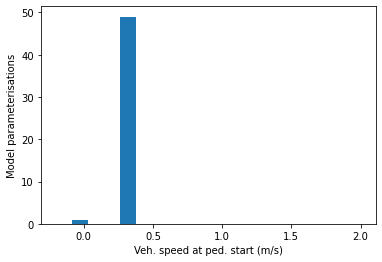

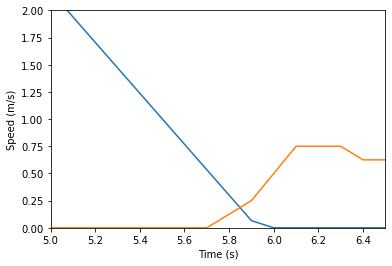

oVAaoBEooBEvoAI
{'T_delta': 60.0, 'beta_V': 9.0, 'T_Of': 0.5, 'sigma_O': 0.05}
Main criteria met: [False  True  True  True]


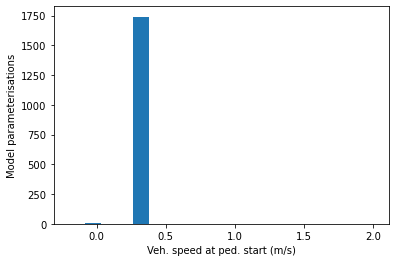

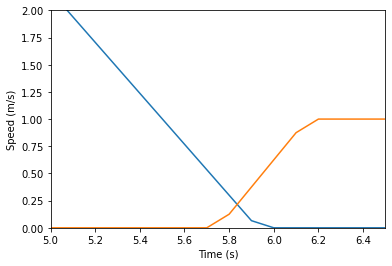

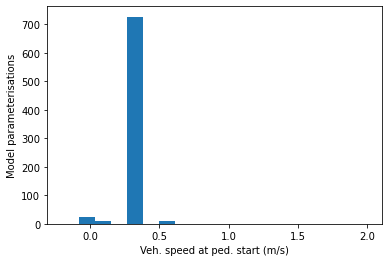

In [34]:
import matplotlib.pyplot as plt
for model in ('oVA', 'oVAoBEvoAI', 'oVAoBEooBEvoAI', 'oVAaoBEooBEvoAI'):
    print(model)
    fit = det_fits[model]
    i_parameterisation = np.nonzero(fit.n_main_criteria_met == np.max(fit.n_main_criteria_met))[0][0]
    params_array = fit.results.params_matrix[i_parameterisation, :]
    crit_array = fit.main_criteria_matrix[:, i_parameterisation]
    print(fit.get_params_dict(params_array))
    print('Main criteria met: ', end='')
    print(crit_array)
    #main_crit_dict = {crit : crit_array[i_crit]
    #                  for i_crit, crit in enumerate(sc_fittingMAIN_CRITERIA)}
    sim = fit.simulate_scenario(sc_fitting.DET1S_SCENARIOS['ActPedPrioEncounter'])
    plt.figure()
    plt.plot(sim.time_stamps, sim.agents[sc_fitting.i_VEH_AGENT].trajectory.long_speed)
    plt.plot(sim.time_stamps, sim.agents[sc_fitting.i_PED_AGENT].trajectory.long_speed)
    plt.axis([5, 6.5, 0, 2])
    plt.xlabel('Time (s)')
    plt.ylabel('Speed (m/s)')
    plt.show()
    plt.figure()
    plt.hist(fit.results.metrics_matrix[
        :,fit.metric_names.index('ActPedPrioEncounter_veh_speed_at_ped_start')],
            bins=np.linspace(-0.2, 2, 20))
    plt.xlabel('Veh. speed at ped. start (m/s)')
    plt.ylabel('Model parameterisations')

## Conclusions

This seems to provide good grounds for discarding the `oVAa` formulations, and for excluding the `ActPedLeading` criteria from the main ones being considered as part of these deterministic fits... But I feel like I need to understand better what's happening in the `ActPedPrioEncounter` scenario first, especially for the `oVAa` model...

Later on, some of the next steps should probably be, in some order:
1. Try model variants without `oVA`, to see if we can rule out also those.
2. Run with `oEA`, to get parameterisations that might be possible to carry over straight to probabilistic fitting.
3. Include also one or more scenarios where both agents are active, for example two encounter scenarios, one with pedestrian priority and one without, to verify correct order of access and absence of collisions.